In [31]:
import numpy as np
from PIL import Image
import torch
import classification_nbv as cnbv

In [33]:
def linear_interpolation(x,p1,p2):
    y = (p1[2] * (p2[1] - x) + p2[2] * (x - p1[1])) / (p2[1] - p1[1])
    return y

In [34]:
x = 14.5
x0 = np.asarray([0,14,95])
x1 = np.asarray([0,15,162])

y = linear_interpolation(x,x0,x1)
y

128.5

In [94]:
#Row y luego column
def bilinear_interpolation(x,p1,p2,p3,p4):
    y1 = linear_interpolation(x[0], p1, p3)
    y2 = linear_interpolation(x[0], p2, p4)
    #print(y1,y2)
    y = ((p2[0] - x[1] )/ (p2[0] - p1[0])) * y1 + ((x[1] - p1[0]) / (p2[0] - p1[0])) * y2
    return y  

In [111]:
x = np.asarray([0.25,0.75])
x0 = np.asarray([0,0,1])
x1 = np.asarray([1,0,0])
x2 = np.asarray([0,1,0.5])
x3 = np.asarray([1,1,1])
y = bilinear_interpolation(x,x0,x1,x2,x3)
y

0.40625

In [103]:
x = np.asarray([14.5,20.2])
x0 = np.asarray([20,14,91])
x1 = np.asarray([21,14,162])
x2 = np.asarray([20,15,210])
x3 = np.asarray([21,15,95])
y = bilinear_interpolation(x,x0,x1,x2,x3)
y

146.10000000000002

In [112]:
nx = 200
ny = 100
channels = 3
print("P3\n{} {} \n255\n".format(nx,ny))
z = np.zeros((nx,ny, channels), dtype='B')
for j in range(ny-1,-1,-1):
  n_y = (j-0)/(ny-0)
  for i in range (0, nx):
    n_x = (i-0.5)/(nx-0.5)
    x = np.asarray([n_x,n_y])
    y = bilinear_interpolation(x,x0,x1,x2,x3)
    z[i,j,0] = int(255.99*y)
    z[i,j,1] = int(255.99*y)
    z[i,j,2] = int(255.99*y)

P3
200 100 
255



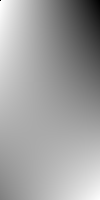

In [113]:
img = Image.fromarray(np.uint8(z), mode='RGB')
img.show()

In [106]:
ppm_header = f'P6 {nx} {ny} {255}\n'
with open('ppm_1.ppm', 'w') as f: #'wb'
  f.write(ppm_header)#bytearray(ppm_header, 'ascii'))
  z.tofile(f)

# Trilienar interpolation

In [1]:
import numpy as np
from PIL import Image
import torch
import classification_nbv as cnbv
import matplotlib.pyplot as plt

In [32]:
obj = np.load('MODELDATASET/completo_val/2_capilla.npy')
obj.shape

(32, 32, 32)

<Figure size 432x288 with 0 Axes>

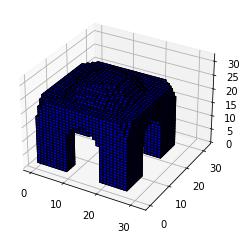

In [3]:
cnbv.showGrid(obj)

### Proceso de interpolación

1. Seleccion del punto a interpolar
2. Selección de vecinos arriba y abajo 
    Si queremos interpolar un punto por decir (0.5,0.5,0.5) tomaremos los vecinos de arriba y abajo, 0 y 1 que crearán las combinaciones posibles de 3 elementos de (0,0,0),...,(1,1,1)
3. Conocidos los vecinos, vamos a tomar los valores de intensidad de cada uno de ellos
4. Vamos a interpolar trilinearmente!
5. Repite

In [20]:
def trilinear_interpolation(point, min_vox, max_vox, voxel_values):
    
    differences = (point - min_vox) / (max_vox - min_vox)
    #print(differences.shape)

    c00 = voxel_values[:,0]*(1-differences[:,:,0]) + voxel_values[:,4]*differences[:,:,0]
    c01 = voxel_values[:,1]*(1-differences[:,:,0]) + voxel_values[:,5]*differences[:,:,0]
    c10 = voxel_values[:,2]*(1-differences[:,:,0]) + voxel_values[:,6]*differences[:,:,0]
    c11 = voxel_values[:,3]*(1-differences[:,:,0]) + voxel_values[:,7]*differences[:,:,0]

    c0 = c00*(1-differences[:,:,1]) + c10*differences[:,:,1]
    c1 = c01*(1-differences[:,:,1]) + c11*differences[:,:,1]
    
    c = c0*(1-differences[:,:,2]) + c1*differences[:,:,2]

    return c


In [ ]:
def get_vertex(points, ):

In [22]:
BOX_OFFSETS1 = np.asarray([[[i,j,k] for i in np.linspace(0,1,10) for j in np.linspace(0,1,10) for k in np.linspace(0,1,10)]])
min = np.asarray([0,0,0])
max = np.asarray([1,1,1])
voxel_values = np.asarray([[1,2,3,4,5,6,7,8]])

In [ ]:
def voxel_resizing(given_point, original_size, desired_size):
    C_1 = original_size/2
    C_2 = desired_size/2

    K = np.min(desired_size/original_size)

    V_1 =C_1 - x #Sustituir X por P1 y P1 es la coordenada original 
    V_2 = V_1 * K
    P_2 = C_2 - V_2 # P2 es la coordenada escalada
    return v

In [23]:
c=  trilinear_interpolation(BOX_OFFSETS1,min, max, voxel_values)

In [25]:
c.shape

(1, 1000)

In [32]:
Desired = np.asarray([31,31,31]) #Tamaño deseado
Original = np.asarray([32,32,32]) #Tamaño original

In [35]:
K = np.min(Desired/Original)
K

0.96875

In [12]:
K = [np.min(Desired[0]/Lx), np.min(Desired[1]/Ly), np.min(Desired[2]/Lz)]
K

/tmp/ipykernel_217769/2461163693.py:1: RuntimeWarning: divide by zero encountered in divide
  K = [np.min(Desired[0]/Lx), np.min(Desired[1]/Ly), np.min(Desired[2]/Lz)]


[0.96875, 0.96875, 3.3368055555555554]

In [17]:
Lx

array([ 1.03225806,  0.        ,  0.        ,  1.03225806,  0.        ,
       32.        ,  1.03225806, 32.        ,  0.        ,  1.03225806,
       32.        , 32.        ])

In [34]:
K = [np.min(Desired[0]/32), np.min(Desired[1]/32), np.min(Desired[2]/32)]
K

[0.96875, 0.96875, 0.96875]

In [36]:
Intensity = (x - Desired/2)/K + ([32/2,32/2,32/2])

In [28]:
C_1 = [32/2,32/2,32/2]
C_2 = Desired/2

In [30]:
V_1 =C_1 - x #Sustituir X por P 
V_2 = V_1 * K

In [31]:
V_2

array([13.5625 ,  5.8125 , 10.65625])

In [41]:
P_2 = C_2 - V_2
P_2

array([1.9375 , 9.6875 , 4.84375])

In [25]:
Intensity

array([ 2.06451613, 10.32258065,  5.16129032])

In [22]:
x = np.asarray([2,10,5])

In [40]:
np.min(np.asarray([256,256,256])/np.asarray([256,256,170]))

1.0

In [16]:
x = np.linspace(0,32,352)

In [17]:
x.shape

(352,)

In [10]:
c= np.floor(x[:])

In [6]:
c.shape

(320,)

In [11]:
cx= np.ceil(x[:])
cx.shape

(320,)

In [12]:
cx

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 19

In [14]:
c

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 18

In [18]:
x

array([ 0.        ,  0.09116809,  0.18233618,  0.27350427,  0.36467236,
        0.45584046,  0.54700855,  0.63817664,  0.72934473,  0.82051282,
        0.91168091,  1.002849  ,  1.09401709,  1.18518519,  1.27635328,
        1.36752137,  1.45868946,  1.54985755,  1.64102564,  1.73219373,
        1.82336182,  1.91452991,  2.00569801,  2.0968661 ,  2.18803419,
        2.27920228,  2.37037037,  2.46153846,  2.55270655,  2.64387464,
        2.73504274,  2.82621083,  2.91737892,  3.00854701,  3.0997151 ,
        3.19088319,  3.28205128,  3.37321937,  3.46438746,  3.55555556,
        3.64672365,  3.73789174,  3.82905983,  3.92022792,  4.01139601,
        4.1025641 ,  4.19373219,  4.28490028,  4.37606838,  4.46723647,
        4.55840456,  4.64957265,  4.74074074,  4.83190883,  4.92307692,
        5.01424501,  5.10541311,  5.1965812 ,  5.28774929,  5.37891738,
        5.47008547,  5.56125356,  5.65242165,  5.74358974,  5.83475783,
        5.92592593,  6.01709402,  6.10826211,  6.1994302 ,  6.29

In [27]:
BOX_OFFSET = np.asarray([[[i,j,k] for i in np.linspace(0,31,310) for j in np.linspace(0,31,310) for k in np.linspace(0,31,310)]])

In [28]:
BOX_OFFSET

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.10032362],
        [ 0.        ,  0.        ,  0.20064725],
        ...,
        [31.        , 31.        , 30.79935275],
        [31.        , 31.        , 30.89967638],
        [31.        , 31.        , 31.        ]]])

In [29]:
BOX_OFFSET.shape

(1, 29791000, 3)

In [68]:
box_floor = np.floor(BOX_OFFSET)

In [73]:
box_ceil = np.ceil(BOX_OFFSET)

In [48]:
a = BOX_OFFSET[:,0]

In [67]:
obj[int(a[0,0]),int(a[0,1]),int(a[0,2])]

0.0

In [65]:
obj[20,25,1]

1.0

In [88]:
box_floor[0,21,0]

0.0

In [87]:
box_ceil[0,21]

array([0., 0., 3.])

In [119]:
nuevo = np.asarray([[ [i,j,k] for i in [box_floor[0,h,0], box_floor[0,h,0]+1] for j in [box_floor[0,h,1], box_floor[0,h,1]+1] for k in [box_floor[0,h,2], box_floor[0,h,2]+1]]])

In [120]:
nuevo.shape

(1, 8, 3)

In [125]:
nuevo[0]

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [98]:
nuevo[0,0]

array([0., 0., 0.])

In [115]:
box_floor = box_floor.astype(int)